<h1>U.S. Medical Insurance Costs</h1>
<h2>Scope Overview:</h2>
<ol>
<li>Goals - Identifying if there is a strong, positive correlation between insurance costs and the number of children a beneficiary claims?</li>
<br>
<li>Data - The provided goal(s) will be investigated using an open-source dataset, "insurance.csv". This file contains information such as age, sex, bmi, number of children, etc. on several beneficiaries around the U.S.</li>
<br>
<li>Analysis - Once the dataset has been processed, an exploratory analysis will be conducted to determine if there's a strong relationship between the variables "number of children" and "charges/cost". If a strong relationship is found, then further analysis will be conducted to determine if the correlation is positive.</li>
</ol>


In [96]:
# Reading in "insurance.csv" as a list of dictionaries for easy access
import csv

dataset = []

with open("insurance.csv") as file:
    reader = csv.DictReader(file)
    next(reader)
    for row in reader:
        dataset.append(row)
        
print(len(dataset))
print(dataset[:2])

1337
[{'age': '18', 'sex': 'male', 'bmi': '33.77', 'children': '1', 'smoker': 'no', 'region': 'southeast', 'charges': '1725.5523'}, {'age': '28', 'sex': 'male', 'bmi': '33', 'children': '3', 'smoker': 'no', 'region': 'southeast', 'charges': '4449.462'}]


In [97]:
def sxx(dataset:dict, x:str):
    """Takes a dictionary and the corresponding x-value as an input and returns the sum of squared deviations from the mean (i.e. SXX)"""
    sum1 = 0
    sum2 = 0
    for n in dataset:
        sum1 += int(n[x]) ** 2
        sum2 += int(n[x])
    out = sum1 - (sum2**2 / len(dataset))
    return out

sxx(dataset, 'children') 
            

1941.745699326851

In [98]:
def syy(dataset:dict, y:str):
    """Takes a dictionary and the corresponding y-vaue as an input and returns the sum of squares of the differences between each y-value and 
    the mean y-value (i.e. SYY)"""
    sum1 = 0
    sum2 = 0
    for n in dataset:
        sum1 += float(n[y]) ** 2
        sum2 += float(n[y])
    out = sum1 - (sum2**2 / len(dataset))
    return out

syy(dataset, 'charges')
    

196061147173.98087

In [99]:
def sxy(dataset:dict, x:str, y:str):
    """Takes a dictionary alonng with x and y variables as an input and returns the covariance between said variables"""
    sum1 = 0
    sumx = 0
    sumy = 0
    
    for n in dataset:
        sum1 += int(n[x]) * float(n[y])
        sumx += int(n[x])
        sumy += float(n[y])
        
    sum2 = sumx * sumy / len(dataset)
    out = sum1 - sum2
    return out

sxy(dataset, 'children', 'charges')    

1331165.9437479414

In [100]:
from math import sqrt

def correlation(dataset:dict, x:str, y:str):
    """A measuer of linear relationship between variabels x and y where the output is between -1 and 1"""
    sx = sxx(dataset, x)
    sy = syy(dataset, y)
    xy = sxy(dataset, x, y)
    
    r = xy / sqrt(sx * sy)
    return r

correlation(dataset, 'children', 'charges')

0.06822448287765946

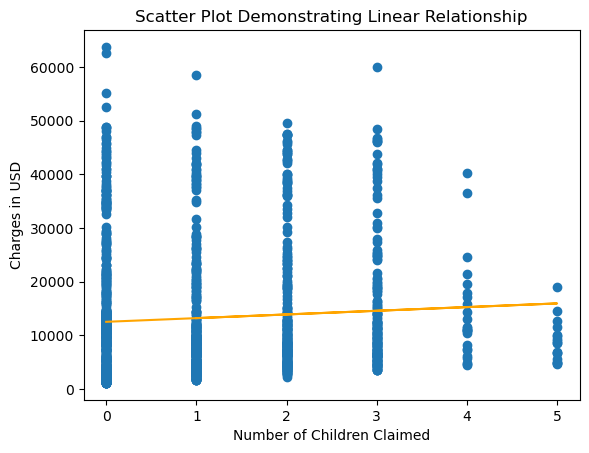

In [101]:
import matplotlib.pyplot as plt
import numpy as np

# Creating arrays for x and y axis
number_of_children = np.array([int(n['children']) for n in dataset])
insurance_charges = np.array([float(n['charges']) for n in dataset])

# Adding linear regression line
m, b = np.polyfit(number_of_children, insurance_charges, 1)
plt.plot(number_of_children, m*number_of_children + b, color='orange')

# Plotting the data and creating labels for the scatter plot
plt.scatter(number_of_children, insurance_charges)
plt.xlabel('Number of Children Claimed')
plt.ylabel('Charges in USD')
plt.title('Scatter Plot Demonstrating Linear Relationship')
plt.show()

<p>While the results did show a positive correlation, the coefficient (0.07) is so close to zero it's considered a weak correlation. In other words there is minimal to no relationship between the number of kids beneficiary claims and the amount charged.</p>